In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Analysis
import os
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
#import regionmask
import pickle
import scipy.stats as stats
import glob
import Ngl
import Nio 
import metpy.calc as mpc
from metpy.units import units



In [2]:
import warnings
warnings.filterwarnings('ignore')


## Read in data

In [3]:
# Set up file path strings
dataDir_wp2   = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/WP2only-64lev/'
dataDir_thlp2 = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/THLP2only-64lev/'
dataDir_rtp2  = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/RTP2only-64lev/'

hmg_startFile = 'FSCAM.T42_T42.arm97.clasp_hmg_startDay'
htg_startFile = 'FSCAM.T42_T42.arm97.clasp_htg_startDay'

middleFile_wp2   = '_64lev_WP2only.cam.h0.2015-'
middleFile_thlp2 = '_64lev_THLP2only.cam.h0.2015-'
middleFile_rtp2  = '_64lev_RTP2only.cam.h0.2015-'

endFile         = '-00000.nc'

# Month/day also factor into naming convention (since these are run for ~2 days and second day is used)
months    = np.ones(31)*6
months[0] = 5
days      = np.arange(0,31)
days[0]   = 31


In [4]:
# Now read in each daily file, and save the appropriate second day to an xr dataset: 

for iDay in range(29):
    
    # Define full file names 
    hmgWP2file      = dataDir_wp2+hmg_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_wp2+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    htgWP2file      = dataDir_wp2+htg_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_wp2+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    
    hmgTHLP2file    = dataDir_thlp2+hmg_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_thlp2+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    htgTHLP2file    = dataDir_thlp2+htg_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_thlp2+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile

    hmgRTP2file    = dataDir_rtp2+hmg_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_rtp2+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile
    htgRTP2file    = dataDir_rtp2+htg_startFile+'0'+str(months[iDay].astype(int))+str('%02i' % days[iDay])+middleFile_rtp2+'0'+str(months[iDay].astype(int))+'-'+str('%02i' % days[iDay])+endFile


    # ---------------------- 
    # Read in data with WP2 only prescribed
    # ----------------------
    # Read in files with homogeneous surface forcing prescribed 
    with xr.open_dataset(hmgWP2file, decode_times=True) as hmgWP2_DS:
        hmgWP2_DS['time']  = hmgWP2_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_hmg  = pd.DatetimeIndex(hmgWP2_DS['time'].values)
        iTimeStart = np.where((times_hmg.day==days[iDay+1]) & (times_hmg.hour==6))[0]
        iTimeEnd   = np.where((times_hmg.day==days[iDay+2]) & (times_hmg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            hmgDS_WP2 = hmgWP2_DS.isel(time=iTimeRange)
        else:
            hmgDS_WP2 = xr.concat([hmgDS_WP2,hmgWP2_DS.isel(time=iTimeRange)], dim='time')


    # Read in files with heterogeneous surface forcing prescribed     
    with xr.open_dataset(htgWP2file, decode_times=True) as htgWP2_DS:
        htgWP2_DS['time']  = htgWP2_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(htgWP2_DS['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            htgDS_WP2 = htgWP2_DS.isel(time=iTimeRange)
        else:
            htgDS_WP2 = xr.concat([htgDS_WP2,htgWP2_DS.isel(time=iTimeRange)], dim='time')
 

    # ---------------------- 
    # Read in data with THLP2 only prescribed
    # ----------------------
    # Read in files with homogeneous surface forcing prescribed 
    with xr.open_dataset(hmgTHLP2file, decode_times=True) as hmgTHLP2_DS:
        hmgTHLP2_DS['time']  = hmgTHLP2_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_hmg  = pd.DatetimeIndex(hmgTHLP2_DS['time'].values)
        iTimeStart = np.where((times_hmg.day==days[iDay+1]) & (times_hmg.hour==6))[0]
        iTimeEnd   = np.where((times_hmg.day==days[iDay+2]) & (times_hmg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            hmgDS_THLP2 = hmgTHLP2_DS.isel(time=iTimeRange)
        else:
            hmgDS_THLP2 = xr.concat([hmgDS_THLP2,hmgTHLP2_DS.isel(time=iTimeRange)], dim='time')


    # Read in files with heterogeneous surface forcing prescribed     
    with xr.open_dataset(htgTHLP2file, decode_times=True) as htgTHLP2_DS:
        htgTHLP2_DS['time']  = htgTHLP2_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(htgTHLP2_DS['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            htgDS_THLP2 = htgTHLP2_DS.isel(time=iTimeRange)
        else:
            htgDS_THLP2 = xr.concat([htgDS_THLP2,htgTHLP2_DS.isel(time=iTimeRange)], dim='time')
    

    # ---------------------- 
    # Read in data with RTP2 only prescribed
    # ----------------------
    # Read in files with homogeneous surface forcing prescribed 
    with xr.open_dataset(hmgRTP2file, decode_times=True) as hmgRTP2_DS:
        hmgRTP2_DS['time']  = hmgRTP2_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_hmg  = pd.DatetimeIndex(hmgRTP2_DS['time'].values)
        iTimeStart = np.where((times_hmg.day==days[iDay+1]) & (times_hmg.hour==6))[0]
        iTimeEnd   = np.where((times_hmg.day==days[iDay+2]) & (times_hmg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            hmgDS_RTP2 = hmgRTP2_DS.isel(time=iTimeRange)
        else:
            hmgDS_RTP2 = xr.concat([hmgDS_RTP2,hmgRTP2_DS.isel(time=iTimeRange)], dim='time')


    # Read in files with heterogeneous surface forcing prescribed     
    with xr.open_dataset(htgRTP2file, decode_times=True) as htgRTP2_DS:
        htgRTP2_DS['time']  = htgRTP2_DS.indexes['time'].to_datetimeindex()
        
        # Select day: 
        times_htg  = pd.DatetimeIndex(htgRTP2_DS['time'].values)
        iTimeStart = np.where((times_htg.day==days[iDay+1]) & (times_htg.hour==6))[0]
        iTimeEnd   = np.where((times_htg.day==days[iDay+2]) & (times_htg.hour==6))[0]
        iTimeRange = np.arange(iTimeStart[0],iTimeEnd[0])
        
        if iDay==0:
            htgDS_RTP2 = htgRTP2_DS.isel(time=iTimeRange)
        else:
            htgDS_RTP2 = xr.concat([htgDS_RTP2,htgRTP2_DS.isel(time=iTimeRange)], dim='time')
    
    print('Done with day %i' % iDay)
    

Done with day 0
Done with day 1
Done with day 2
Done with day 3
Done with day 4
Done with day 5
Done with day 6
Done with day 7
Done with day 8
Done with day 9
Done with day 10
Done with day 11
Done with day 12
Done with day 13
Done with day 14
Done with day 15
Done with day 16
Done with day 17
Done with day 18
Done with day 19
Done with day 20
Done with day 21
Done with day 22
Done with day 23
Done with day 24
Done with day 25
Done with day 26
Done with day 27
Done with day 28


In [5]:
# Also read in the IOP files from Nate:
nateHMGfile = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-hmg.nc'
nateHTGfile = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-htg.nc'

nateHMG = xr.open_dataset(nateHMGfile,decode_times=True)
nateHTG = xr.open_dataset(nateHTGfile,decode_times=True)

nateTime = pd.DatetimeIndex(nateHMG.time.values, tz='UTC')


**Convert to local time**

In [6]:
# Convert times to a pandas datetime array, with UTC timezone
timesHTG = pd.DatetimeIndex(htgDS_WP2.time.values, tz='UTC')
timesHMG = pd.DatetimeIndex(hmgDS_WP2.time.values, tz='UTC')

# Now convert those to Central time 
timesHTG_local = timesHTG.tz_convert(tz='US/Central') 
timesHMG_local = timesHMG.tz_convert(tz='US/Central') 

timesNate_local = nateTime.tz_convert(tz='US/Central')

**Sanity check**

(16587.0, 16597.0)

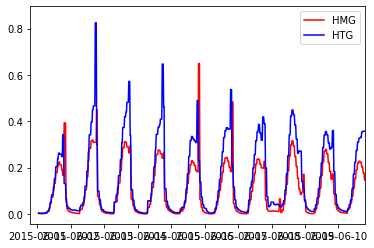

In [7]:
plt.plot(timesHTG_local, np.squeeze(hmgDS_RTP2.RTP2_CLUBB.values)[:,-1],'r',label='HMG')
plt.plot(timesHTG_local, np.squeeze(htgDS_RTP2.RTP2_CLUBB.values)[:,-1],'b',label='HTG')
plt.legend()

plt.xlim(datetime.date(2015,6,1), datetime.date(2015,6,11))

(16587.0, 16597.0)

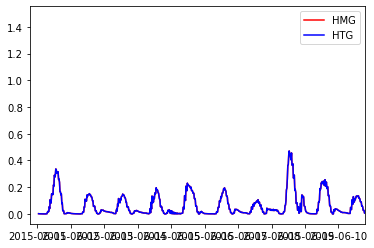

In [8]:
plt.plot(timesHTG_local, np.squeeze(hmgDS_RTP2.THLP2_CLUBB.values)[:,-1],'r',label='HMG')
plt.plot(timesHTG_local, np.squeeze(htgDS_RTP2.THLP2_CLUBB.values)[:,-1],'b',label='HTG')
plt.legend()

plt.xlim(datetime.date(2015,6,1), datetime.date(2015,6,11))

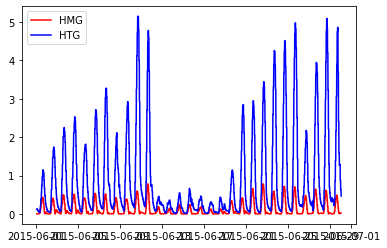

In [9]:
plt.plot(timesHTG_local, np.squeeze(hmgDS_THLP2.THLP2_CLUBB.values)[:,-1],'r',label='HMG')
plt.plot(timesHTG_local, np.squeeze(htgDS_THLP2.THLP2_CLUBB.values)[:,-1],'b',label='HTG')
plt.legend()


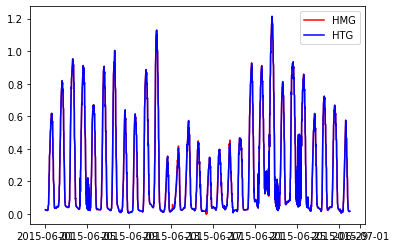

In [10]:
plt.plot(timesHTG_local, np.squeeze(hmgDS_WP2.WP2_CLUBB.values)[:,-2],'r',label='HMG')
plt.plot(timesHTG_local, np.squeeze(htgDS_WP2.WP2_CLUBB.values)[:,-2],'b',label='HTG')
plt.legend()


## Interpolate to constant pressure levels

In [11]:
# New pressure levels in hPa 
pnew64 = np.arange(700.0,990.0,10.0) 


In [12]:
# ---------------------------------------------------
#   WP2 only simulation 
# ---------------------------------------------------
p0mb = htgDS_WP2.P0.values[0]/100        # mb
# Pull out hya/hyb profiles 
hyam = htgDS_WP2.hyam.values[0,:]
hybm = htgDS_WP2.hybm.values[0,:]
hyai = htgDS_WP2.hyai.values[0,:]
hybi = htgDS_WP2.hybi.values[0,:]

# Surface pressure with time dimension
PS_htg   = htgDS_WP2.PS.values              # Pa 
PS_hmg   = hmgDS_WP2.PS.values              # Pa

# Converting HTG variables: 
THLP2_htgWP2  = Ngl.vinth2p(htgDS_WP2.THLP2_CLUBB.values,    hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPTHLP_htgWP2 = Ngl.vinth2p(htgDS_WP2.WPTHLP_CLUBB.values,    hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
UP2_htgWP2    = Ngl.vinth2p(htgDS_WP2.UP2_CLUBB.values,       hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WP2_htgWP2    = Ngl.vinth2p(htgDS_WP2.WP2_CLUBB.values,       hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WP3_htgWP2    = Ngl.vinth2p(htgDS_WP2.WP3_CLUBB.values,       hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPRTP_htgWP2  = Ngl.vinth2p(htgDS_WP2.WPRTP_CLUBB.values,     hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
RTP2_htgWP2   = Ngl.vinth2p(htgDS_WP2.RTP2_CLUBB.values,      hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
RTPTHLP_htgWP2   = Ngl.vinth2p(htgDS_WP2.RTPTHLP_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPTHVP_htgWP2 = Ngl.vinth2p(htgDS_WP2.WPTHVP_CLUBB.values,  hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
WSUB_htgWP2   = Ngl.vinth2p(htgDS_WP2.WSUB.values,          hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
T_htgWP2      = Ngl.vinth2p(htgDS_WP2.T.values,             hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
Q_htgWP2      = Ngl.vinth2p(htgDS_WP2.Q.values,             hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
OMEGA_htgWP2  = Ngl.vinth2p(htgDS_WP2.OMEGA.values ,        hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
THETAL_htgWP2 = Ngl.vinth2p(htgDS_WP2.THETAL.values,        hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
RVMTEND_htgWP2 = Ngl.vinth2p(htgDS_WP2.RVMTEND_CLUBB.values,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)

# Converting HMG variables: 
THLP2_hmgWP2  = Ngl.vinth2p(hmgDS_WP2.THLP2_CLUBB.values,     hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPTHLP_hmgWP2 = Ngl.vinth2p(hmgDS_WP2.WPTHLP_CLUBB.values,    hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
UP2_hmgWP2    = Ngl.vinth2p(hmgDS_WP2.UP2_CLUBB.values,       hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WP2_hmgWP2    = Ngl.vinth2p(hmgDS_WP2.WP2_CLUBB.values,       hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WP3_hmgWP2    = Ngl.vinth2p(hmgDS_WP2.WP3_CLUBB.values,       hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPRTP_hmgWP2  = Ngl.vinth2p(hmgDS_WP2.WPRTP_CLUBB.values,     hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
RTP2_hmgWP2   = Ngl.vinth2p(hmgDS_WP2.RTP2_CLUBB.values,      hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
RTPTHLP_hmgWP2   = Ngl.vinth2p(hmgDS_WP2.RTPTHLP_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPTHVP_hmgWP2 = Ngl.vinth2p(hmgDS_WP2.WPTHVP_CLUBB.values,  hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
WSUB_hmgWP2   = Ngl.vinth2p(hmgDS_WP2.WSUB.values ,         hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
T_hmgWP2      = Ngl.vinth2p(hmgDS_WP2.T.values,             hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
Q_hmgWP2      = Ngl.vinth2p(hmgDS_WP2.Q.values,             hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
OMEGA_hmgWP2  = Ngl.vinth2p(hmgDS_WP2.OMEGA.values ,        hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
THETAL_hmgWP2 = Ngl.vinth2p(hmgDS_WP2.THETAL.values,        hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
RVMTEND_hmgWP2 = Ngl.vinth2p(hmgDS_WP2.RVMTEND_CLUBB.values,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)


# ---------------------------------------------------
#   THLP2 only simulation
# ---------------------------------------------------
p0mb = htgDS_THLP2.P0.values[0]/100        # mb
# Pull out hya/hyb profiles 
hyam = htgDS_THLP2.hyam.values[0,:]
hybm = htgDS_THLP2.hybm.values[0,:]
hyai = htgDS_THLP2.hyai.values[0,:]
hybi = htgDS_THLP2.hybi.values[0,:]

# Surface pressure with time dimension
PS_htg   = htgDS_THLP2.PS.values              # Pa 
PS_hmg   = hmgDS_THLP2.PS.values              # Pa

# Converting HTG variables: 
THLP2_htgTHLP2     = Ngl.vinth2p(htgDS_THLP2.THLP2_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPTHLP_htgTHLP2    = Ngl.vinth2p(htgDS_THLP2.WPTHLP_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
UP2_htgTHLP2       = Ngl.vinth2p(htgDS_THLP2.UP2_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
VP2_htgTHLP2       = Ngl.vinth2p(htgDS_THLP2.VP2_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WP2_htgTHLP2       = Ngl.vinth2p(htgDS_THLP2.WP2_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WP3_htgTHLP2       = Ngl.vinth2p(htgDS_THLP2.WP3_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPRTP_htgTHLP2     = Ngl.vinth2p(htgDS_THLP2.WPRTP_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
RTP2_htgTHLP2      = Ngl.vinth2p(htgDS_THLP2.RTP2_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
RTPTHLP_htgTHLP2   = Ngl.vinth2p(htgDS_THLP2.RTPTHLP_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPTHVP_htgTHLP2  = Ngl.vinth2p(htgDS_THLP2.WPTHVP_CLUBB.values,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
WSUB_htgTHLP2    = Ngl.vinth2p(htgDS_THLP2.WSUB.values ,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
T_htgTHLP2       = Ngl.vinth2p(htgDS_THLP2.T.values,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
Q_htgTHLP2       = Ngl.vinth2p(htgDS_THLP2.Q.values,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
OMEGA_htgTHLP2   = Ngl.vinth2p(htgDS_THLP2.OMEGA.values ,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
U_htgTHLP2       = Ngl.vinth2p(htgDS_THLP2.U.values ,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
V_htgTHLP2       = Ngl.vinth2p(htgDS_THLP2.V.values ,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
THETAL_htgTHLP2  = Ngl.vinth2p(htgDS_THLP2.THETAL.values,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
RVMTEND_htgTHLP2 = Ngl.vinth2p(htgDS_THLP2.RVMTEND_CLUBB.values,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
STEND_htgTHLP2   = Ngl.vinth2p(htgDS_THLP2.STEND_CLUBB.values,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
TKE_htgTHLP2     = Ngl.vinth2p(htgDS_THLP2.TKE.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)

# Converting HMG variables: 
THLP2_hmgTHLP2     = Ngl.vinth2p(hmgDS_THLP2.THLP2_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPTHLP_hmgTHLP2    = Ngl.vinth2p(hmgDS_THLP2.WPTHLP_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
UP2_hmgTHLP2       = Ngl.vinth2p(hmgDS_THLP2.UP2_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
VP2_hmgTHLP2       = Ngl.vinth2p(hmgDS_THLP2.VP2_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WP2_hmgTHLP2       = Ngl.vinth2p(hmgDS_THLP2.WP2_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WP3_hmgTHLP2       = Ngl.vinth2p(hmgDS_THLP2.WP3_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPRTP_hmgTHLP2     = Ngl.vinth2p(hmgDS_THLP2.WPRTP_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
RTP2_hmgTHLP2      = Ngl.vinth2p(hmgDS_THLP2.RTP2_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
RTPTHLP_hmgTHLP2   = Ngl.vinth2p(hmgDS_THLP2.RTPTHLP_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPTHVP_hmgTHLP2    = Ngl.vinth2p(hmgDS_THLP2.WPTHVP_CLUBB.values,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
WSUB_hmgTHLP2      = Ngl.vinth2p(hmgDS_THLP2.WSUB.values ,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
T_hmgTHLP2         = Ngl.vinth2p(hmgDS_THLP2.T.values,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
Q_hmgTHLP2         = Ngl.vinth2p(hmgDS_THLP2.Q.values,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
OMEGA_hmgTHLP2     = Ngl.vinth2p(hmgDS_THLP2.OMEGA.values ,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
U_hmgTHLP2         = Ngl.vinth2p(hmgDS_THLP2.U.values ,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
V_hmgTHLP2         = Ngl.vinth2p(hmgDS_THLP2.V.values ,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
THETAL_hmgTHLP2    = Ngl.vinth2p(hmgDS_THLP2.THETAL.values,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
RVMTEND_hmgTHLP2   = Ngl.vinth2p(hmgDS_THLP2.RVMTEND_CLUBB.values,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
STEND_hmgTHLP2     = Ngl.vinth2p(hmgDS_THLP2.STEND_CLUBB.values,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
TKE_hmgTHLP2       = Ngl.vinth2p(hmgDS_THLP2.TKE.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)

# ---------------------------------------------------
#   RTP2 only simulation 
# ---------------------------------------------------
p0mb = htgDS_RTP2.P0.values[0]/100        # mb
# Pull out hya/hyb profiles 
hyam = htgDS_RTP2.hyam.values[0,:]
hybm = htgDS_RTP2.hybm.values[0,:]
hyai = htgDS_RTP2.hyai.values[0,:]
hybi = htgDS_RTP2.hybi.values[0,:]

# Surface pressure with time dimension
PS_htg   = htgDS_RTP2.PS.values              # Pa 
PS_hmg   = hmgDS_RTP2.PS.values              # Pa

# Converting HTG variables: 
THLP2_htgRTP2  = Ngl.vinth2p(htgDS_RTP2.THLP2_CLUBB.values,     hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPTHLP_htgRTP2 = Ngl.vinth2p(htgDS_RTP2.WPTHLP_CLUBB.values,    hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
UP2_htgRTP2    = Ngl.vinth2p(htgDS_RTP2.UP2_CLUBB.values,       hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WP2_htgRTP2    = Ngl.vinth2p(htgDS_RTP2.WP2_CLUBB.values,       hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WP3_htgRTP2    = Ngl.vinth2p(htgDS_RTP2.WP3_CLUBB.values,       hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPRTP_htgRTP2  = Ngl.vinth2p(htgDS_RTP2.WPRTP_CLUBB.values,     hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
RTP2_htgRTP2   = Ngl.vinth2p(htgDS_RTP2.RTP2_CLUBB.values,      hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
RTPTHLP_htgRTP2   = Ngl.vinth2p(htgDS_RTP2.RTPTHLP_CLUBB.values,hyai,hybi,pnew64,PS_htg,1,p0mb,1,True)
WPTHVP_htgRTP2 = Ngl.vinth2p(htgDS_RTP2.WPTHVP_CLUBB.values,  hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
WSUB_htgRTP2   = Ngl.vinth2p(htgDS_RTP2.WSUB.values,          hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
T_htgRTP2      = Ngl.vinth2p(htgDS_RTP2.T.values,             hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
Q_htgRTP2      = Ngl.vinth2p(htgDS_RTP2.Q.values,             hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
OMEGA_htgRTP2  = Ngl.vinth2p(htgDS_RTP2.OMEGA.values ,        hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
THETAL_htgRTP2 = Ngl.vinth2p(htgDS_RTP2.THETAL.values,        hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)
RVMTEND_htgRTP2 = Ngl.vinth2p(htgDS_WP2.RVMTEND_CLUBB.values,hyam,hybm,pnew64,PS_htg,1,p0mb,1,True)

# Converting HMG variables: 
THLP2_hmgRTP2  = Ngl.vinth2p(hmgDS_RTP2.THLP2_CLUBB.values,     hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPTHLP_hmgRTP2 = Ngl.vinth2p(hmgDS_RTP2.WPTHLP_CLUBB.values,    hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
UP2_hmgRTP2    = Ngl.vinth2p(hmgDS_RTP2.UP2_CLUBB.values,       hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WP2_hmgRTP2    = Ngl.vinth2p(hmgDS_RTP2.WP2_CLUBB.values,       hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WP3_hmgRTP2    = Ngl.vinth2p(hmgDS_RTP2.WP3_CLUBB.values,       hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPRTP_hmgRTP2  = Ngl.vinth2p(hmgDS_RTP2.WPRTP_CLUBB.values,     hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
RTP2_hmgRTP2   = Ngl.vinth2p(hmgDS_RTP2.RTP2_CLUBB.values,      hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
RTPTHLP_hmgRTP2   = Ngl.vinth2p(hmgDS_RTP2.RTPTHLP_CLUBB.values,hyai,hybi,pnew64,PS_hmg,1,p0mb,1,True)
WPTHVP_hmgRTP2 = Ngl.vinth2p(hmgDS_RTP2.WPTHVP_CLUBB.values,  hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
WSUB_hmgRTP2   = Ngl.vinth2p(hmgDS_RTP2.WSUB.values ,         hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
T_hmgRTP2      = Ngl.vinth2p(hmgDS_RTP2.T.values,             hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
Q_hmgRTP2      = Ngl.vinth2p(hmgDS_RTP2.Q.values,             hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
OMEGA_hmgRTP2  = Ngl.vinth2p(hmgDS_RTP2.OMEGA.values ,        hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
THETAL_hmgRTP2 = Ngl.vinth2p(hmgDS_RTP2.THETAL.values,        hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)
RVMTEND_hmgRTP2 = Ngl.vinth2p(hmgDS_RTP2.RVMTEND_CLUBB.values,hyam,hybm,pnew64,PS_hmg,1,p0mb,1,True)




In [13]:
# Compute TKE using equation 9.6 in Wallace and Hobbs: 
#   TKE = 0.5 * (up2 + vp2 + wp3)
# TKE_hmg64 = 0.5*(UP2_hmg64 + VP2_hmg64 + WP2_hmg64)
# TKE_htg64 = 0.5*(UP2_htg64 + VP2_htg64 + WP2_htg64)

# Following Rich's advice, just use the vertical component for this 
TKE_hmgWP2 = 0.5*(WP2_hmgWP2)
TKE_htgWP2 = 0.5*(WP2_htgWP2)

TKE_hmgTHLP2 = 0.5*(WP2_hmgTHLP2)
TKE_htgTHLP2 = 0.5*(WP2_htgTHLP2)

TKE_hmgRT2 = 0.5*(WP2_hmgRTP2)
TKE_htgRTP2 = 0.5*(WP2_htgRTP2)


## Look at mean diurnal cycle

In [14]:
# Mean diurnal PBLH cycle?
meanDiurnal_HTGwp2 = htgDS_WP2.groupby("time.hour").mean()
meanDiurnal_HMGwp2 = hmgDS_WP2.groupby("time.hour").mean()

meanDiurnal_HTGthlp2 = htgDS_THLP2.groupby("time.hour").mean()
meanDiurnal_HMGthlp2 = hmgDS_THLP2.groupby("time.hour").mean()

meanDiurnal_HTGrtp2 = htgDS_RTP2.groupby("time.hour").mean()
meanDiurnal_HMGrtp2 = hmgDS_RTP2.groupby("time.hour").mean()


In [15]:
# Easier to plot in local time, so let's double up on the diurnal cycle,
#  Then plot the correct section representing 12a-12a
# 
# CDT to UTC: 12a CDT = 5a UTC, so 5 hour offset 
htgWP2_diurnalPBL_double = np.full([48], np.nan)
htgWP2_diurnalPBL_double[0:24] = np.squeeze(meanDiurnal_HTGwp2.PBLH.values)
htgWP2_diurnalPBL_double[24::] = np.squeeze(meanDiurnal_HTGwp2.PBLH.values)

hmgWP2_diurnalPBL_double = np.full([48], np.nan)
hmgWP2_diurnalPBL_double[0:24] = np.squeeze(meanDiurnal_HMGwp2.PBLH.values)
hmgWP2_diurnalPBL_double[24::] = np.squeeze(meanDiurnal_HMGwp2.PBLH.values)

htgTHLP2_diurnalPBL_double = np.full([48], np.nan)
htgTHLP2_diurnalPBL_double[0:24] = np.squeeze(meanDiurnal_HTGthlp2.PBLH.values)
htgTHLP2_diurnalPBL_double[24::] = np.squeeze(meanDiurnal_HTGthlp2.PBLH.values)

hmgTHLP2_diurnalPBL_double = np.full([48], np.nan)
hmgTHLP2_diurnalPBL_double[0:24] = np.squeeze(meanDiurnal_HMGthlp2.PBLH.values)
hmgTHLP2_diurnalPBL_double[24::] = np.squeeze(meanDiurnal_HMGthlp2.PBLH.values)


htgRTP2_diurnalPBL_double = np.full([48], np.nan)
htgRTP2_diurnalPBL_double[0:24] = np.squeeze(meanDiurnal_HTGrtp2.PBLH.values)
htgRTP2_diurnalPBL_double[24::] = np.squeeze(meanDiurnal_HTGrtp2.PBLH.values)

hmgRTP2_diurnalPBL_double = np.full([48], np.nan)
hmgRTP2_diurnalPBL_double[0:24] = np.squeeze(meanDiurnal_HMGrtp2.PBLH.values)
hmgRTP2_diurnalPBL_double[24::] = np.squeeze(meanDiurnal_HMGrtp2.PBLH.values)


hoursDouble = np.full([48],np.nan)
hoursDouble[0:24] = meanDiurnal_HMGthlp2.hour.values
hoursDouble[24::] = meanDiurnal_HMGthlp2.hour.values+24


(0.0, 2000.0)

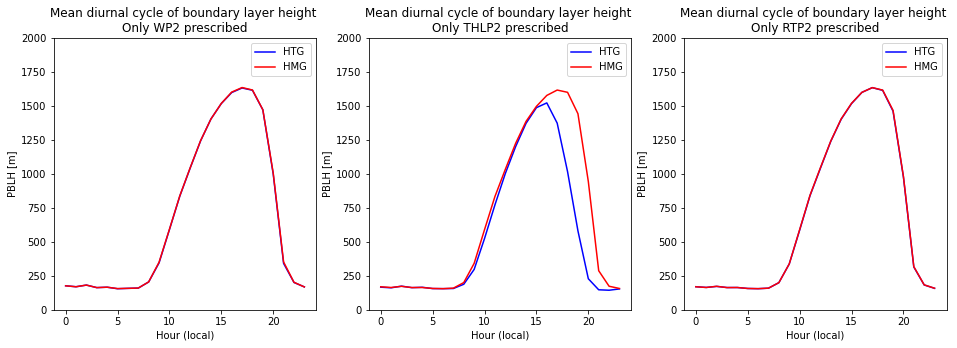

In [53]:
fig, axs_all = plt.subplots(1,3, figsize=(16, 5), 
                     facecolor='w', edgecolor='k')

axs = axs_all.ravel()
fig.subplots_adjust(hspace=0.1)

axs[0].plot(meanDiurnal_HTGwp2.hour.values,htgWP2_diurnalPBL_double[5:29],'b',label='HTG')
axs[0].plot(meanDiurnal_HTGwp2.hour.values,hmgWP2_diurnalPBL_double[5:29],'r',label='HMG')
axs[0].legend()
axs[0].set_title('Mean diurnal cycle of boundary layer height \nOnly WP2 prescribed')
axs[0].set_xlabel('Hour (local)')
axs[0].set_ylabel('PBLH [m]')
axs[0].set_ylim([0, 2000])

axs[1].plot(meanDiurnal_HTGthlp2.hour.values,htgTHLP2_diurnalPBL_double[5:29],'b',label='HTG')
axs[1].plot(meanDiurnal_HTGthlp2.hour.values,hmgTHLP2_diurnalPBL_double[5:29],'r',label='HMG')
axs[1].legend()
axs[1].set_title('Mean diurnal cycle of boundary layer height \nOnly THLP2 prescribed')
axs[1].set_xlabel('Hour (local)')
axs[1].set_ylabel('PBLH [m]')
axs[1].set_ylim([0, 2000])

axs[2].plot(meanDiurnal_HTGthlp2.hour.values,htgRTP2_diurnalPBL_double[5:29],'b',label='HTG')
axs[2].plot(meanDiurnal_HTGthlp2.hour.values,hmgRTP2_diurnalPBL_double[5:29],'r',label='HMG')
axs[2].legend()
axs[2].set_title('Mean diurnal cycle of boundary layer height \nOnly RTP2 prescribed')
axs[2].set_xlabel('Hour (local)')
axs[2].set_ylabel('PBLH [m]')
axs[2].set_ylim([0, 2000])


In [29]:
np.mean(abs(htgWP2_diurnalPBL_double[5:29]-hmgWP2_diurnalPBL_double[5:29]))

1.8812103271484375

In [30]:
np.mean(abs(htgRTP2_diurnalPBL_double[5:29]-hmgRTP2_diurnalPBL_double[5:29]))

1.4900881449381511

## Separate into early/late dry periods

In [16]:
# Define three different periods... 
iEarlyDry = np.where(timesHTG_local.day<=11)[0]
iWet      = np.where( (timesHTG_local.day>=12) & (timesHTG_local.day<=19) )[0]
iLateDry  = np.where(timesHTG_local.day>=20)[0]



In [33]:
# Specific Humidity 
dailyQ_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyQ_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# Liquid water potential temperature 
dailyTHETAL_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyTHETAL_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# Moisture flux 
dailyWPRTP_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyWPRTP_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# Heat flux 
dailyWPTHLP_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyWPTHLP_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# Buoyancy flux 
dailyWPTHVP_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyWPTHVP_htgTHLP2= np.full([30,72, len(pnew64)], np.nan)

# Vertical velocity variance 
dailyWP2_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyWP2_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# Omega 
dailyOMEGA_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyOMEGA_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# TKE 
dailyTKE_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyTKE_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# CLUBB Water Vapor Tendency
dailyRVMTEND_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyRVMTEND_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# CLUBB Static energy Tendency
dailySTEND_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailySTEND_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# RTP2 
dailyRTP2_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyRTP2_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

# THLP2 
dailyTHLP2_hmgTHLP2 = np.full([30,72, len(pnew64)], np.nan)
dailyTHLP2_htgTHLP2 = np.full([30,72, len(pnew64)], np.nan)

for days in range(29):
    iDay = np.where(timesHMG_local.day==(days+1))[0]
    
    # The first day starts at 01 local time, not 00, so missing 3 first points:
    if days==0:
        # Specific Humidity         
        dailyQ_hmgTHLP2[days,3::,:] = np.squeeze(Q_hmgTHLP2)[iDay,:]
        dailyQ_htgTHLP2[days,3::,:] = np.squeeze(Q_htgTHLP2)[iDay,:]
        
        # CLUBB Water Vapor Tendency
        dailyRVMTEND_hmgTHLP2[days,3::,:] = np.squeeze(RVMTEND_hmgTHLP2)[iDay,:]
        dailyRVMTEND_htgTHLP2[days,3::,:] = np.squeeze(RVMTEND_htgTHLP2)[iDay,:]
        
        # Liquid water potential temperature 
        dailyTHETAL_hmgTHLP2[days,3::,:] = np.squeeze(THETAL_hmgTHLP2)[iDay,:]
        dailyTHETAL_htgTHLP2[days,3::,:] = np.squeeze(THETAL_htgTHLP2)[iDay,:]
        
        # Moisture flux
        dailyWPRTP_hmgTHLP2[days,3::,:] = np.squeeze(WPRTP_hmgTHLP2)[iDay,:]
        dailyWPRTP_htgTHLP2[days,3::,:] = np.squeeze(WPRTP_htgTHLP2)[iDay,:]
        
        #Heat flux 
        dailyWPTHLP_hmgTHLP2[days,3::,:] = np.squeeze(WPTHLP_hmgTHLP2)[iDay,:]
        dailyWPTHLP_htgTHLP2[days,3::,:] = np.squeeze(WPTHLP_htgTHLP2)[iDay,:]
        
        # Buoyancy flux 
        dailyWPTHVP_hmgTHLP2[days,3::,:] = np.squeeze(WPTHVP_hmgTHLP2)[iDay,:]
        dailyWPTHVP_htgTHLP2[days,3::,:] = np.squeeze(WPTHVP_htgTHLP2)[iDay,:]
        
        # Vertical velcoity variance 
        dailyWP2_hmgTHLP2[days,3::,:] = np.squeeze(WP2_hmgTHLP2)[iDay,:]
        dailyWP2_htgTHLP2[days,3::,:] = np.squeeze(WP2_htgTHLP2)[iDay,:]
        
        # OMEGA
        dailyOMEGA_hmgTHLP2[days,3::,:] = np.squeeze(OMEGA_hmgTHLP2)[iDay,:]
        dailyOMEGA_htgTHLP2[days,3::,:] = np.squeeze(OMEGA_htgTHLP2)[iDay,:]
        
        # TKE
        dailyTKE_hmgTHLP2[days,3::,:] = np.squeeze(TKE_hmgTHLP2)[iDay,:]
        dailyTKE_htgTHLP2[days,3::,:] = np.squeeze(TKE_htgTHLP2)[iDay,:]
        
        # CLUBB Static Energy Tendency
        dailySTEND_hmgTHLP2[days,3::,:] = np.squeeze(STEND_hmgTHLP2)[iDay,:]
        dailySTEND_htgTHLP2[days,3::,:] = np.squeeze(STEND_htgTHLP2)[iDay,:]
        
        # RTP2
        dailyRTP2_hmgTHLP2[days,3::,:] = np.squeeze(RTP2_hmgTHLP2)[iDay,:]
        dailyRTP2_htgTHLP2[days,3::,:] = np.squeeze(RTP2_htgTHLP2)[iDay,:]
        
        # THLP2
        dailyTHLP2_hmgTHLP2[days,3::,:] = np.squeeze(THLP2_hmgTHLP2)[iDay,:]
        dailyTHLP2_htgTHLP2[days,3::,:] = np.squeeze(THLP2_htgTHLP2)[iDay,:]
        
        
    else:
         # Specific Humidity         
        dailyQ_hmgTHLP2[days,:,:] = np.squeeze(Q_hmgTHLP2)[iDay,:]
        dailyQ_htgTHLP2[days,:,:] = np.squeeze(Q_htgTHLP2)[iDay,:]
        
        # CLUBB Water Vapor Tendency
        dailyRVMTEND_hmgTHLP2[days,:,:] = np.squeeze(RVMTEND_hmgTHLP2)[iDay,:]
        dailyRVMTEND_htgTHLP2[days,:,:] = np.squeeze(RVMTEND_htgTHLP2)[iDay,:]
        
        # Liquid water potential temperature 
        dailyTHETAL_hmgTHLP2[days,:,:] = np.squeeze(THETAL_hmgTHLP2)[iDay,:]
        dailyTHETAL_htgTHLP2[days,:,:] = np.squeeze(THETAL_htgTHLP2)[iDay,:]
        
        # Moisture flux
        dailyWPRTP_hmgTHLP2[days,:,:] = np.squeeze(WPRTP_hmgTHLP2)[iDay,:]
        dailyWPRTP_htgTHLP2[days,:,:] = np.squeeze(WPRTP_htgTHLP2)[iDay,:]
        
        #Heat flux 
        dailyWPTHLP_hmgTHLP2[days,:,:] = np.squeeze(WPTHLP_hmgTHLP2)[iDay,:]
        dailyWPTHLP_htgTHLP2[days,:,:] = np.squeeze(WPTHLP_htgTHLP2)[iDay,:]
        
        # Buoyancy flux 
        dailyWPTHVP_hmgTHLP2[days,:,:] = np.squeeze(WPTHVP_hmgTHLP2)[iDay,:]
        dailyWPTHVP_htgTHLP2[days,:,:] = np.squeeze(WPTHVP_htgTHLP2)[iDay,:]
        
        # Vertical velcoity variance 
        dailyWP2_hmgTHLP2[days,:,:] = np.squeeze(WP2_hmgTHLP2)[iDay,:]
        dailyWP2_htgTHLP2[days,:,:] = np.squeeze(WP2_htgTHLP2)[iDay,:]
        
        # OMEGA
        dailyOMEGA_hmgTHLP2[days,:,:] = np.squeeze(OMEGA_hmgTHLP2)[iDay,:]
        dailyOMEGA_htgTHLP2[days,:,:] = np.squeeze(OMEGA_htgTHLP2)[iDay,:]
        
        # TKE
        dailyTKE_hmgTHLP2[days,:,:] = np.squeeze(TKE_hmgTHLP2)[iDay,:]
        dailyTKE_htgTHLP2[days,:,:] = np.squeeze(TKE_htgTHLP2)[iDay,:]
        
        # CLUBB Static Energy Tendency
        dailySTEND_hmgTHLP2[days,:,:] = np.squeeze(STEND_hmgTHLP2)[iDay,:]
        dailySTEND_htgTHLP2[days,:,:] = np.squeeze(STEND_htgTHLP2)[iDay,:]
        
        # RTP2
        dailyRTP2_hmgTHLP2[days,:,:] = np.squeeze(RTP2_hmgTHLP2)[iDay,:]
        dailyRTP2_htgTHLP2[days,:,:] = np.squeeze(RTP2_htgTHLP2)[iDay,:]
        
        # THLP2
        dailyTHLP2_hmgTHLP2[days,:,:] = np.squeeze(THLP2_hmgTHLP2)[iDay,:]
        dailyTHLP2_htgTHLP2[days,:,:] = np.squeeze(THLP2_htgTHLP2)[iDay,:]        
        
# ----------------------------------------------------        
# Average over all the days in a period 
# ----------------------------------------------------

# Specific Humidity 
earlyPeriod_QdiffTHLP2  = np.nanmean( (dailyQ_htgTHLP2[0:11,:,:] - dailyQ_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_Qdiff64  = np.nanmean( (dailyQ_htg64[11:20,:,:] - dailyQ_hmg64[11:20,:,:]), axis=0)
# latePeriod_Qdiff64  = np.nanmean( (dailyQ_htg64[20::,:,:] - dailyQ_hmg64[20::,:,:]), axis=0)


# CLUBB Water Vapor Tendency 
# earlyPeriod_RVMTENDhmg64 = np.nanmean(dailyRVMTEND_hmg64[0:11,:,:], axis=0)
# earlyPeriod_RVMTENDhtg64 = np.nanmean(dailyRVMTEND_htg64[0:11,:,:], axis=0)
earlyPeriod_RVMTENDdiffTHLP2  = np.nanmean( (dailyRVMTEND_htgTHLP2[0:11,:,:] - dailyRVMTEND_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_RVMTENDdiff64  = np.nanmean( (dailyRVMTEND_htg64[11:20,:,:] - dailyRVMTEND_hmg64[11:20,:,:]), axis=0)
# latePeriod_RVMTENDdiff64  = np.nanmean( (dailyRVMTEND_htg64[20::,:,:] - dailyRVMTEND_hmg64[20::,:,:]), axis=0)

# Liquid water potential temperature 
# earlyPeriod_THLPhmg64 = np.nanmean(dailyTHETAL_hmg64[0:11,:,:], axis=0)
# earlyPeriod_THLPhtg64 = np.nanmean(dailyTHETAL_htg64[0:11,:,:], axis=0)
earlyPeriod_THLPdiffTHLP2 = np.nanmean( (dailyTHETAL_htgTHLP2[0:11,:,:] - dailyTHETAL_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_THLPdiff64   = np.nanmean( (dailyTHETAL_htg64[11:20,:,:] - dailyTHETAL_hmg64[11:20,:,:]), axis=0)
# latePeriod_THLPdiff64  = np.nanmean( (dailyTHETAL_htg64[20::,:,:] - dailyTHETAL_hmg64[20::,:,:]), axis=0)

# Moisture Flux 
earlyPeriod_WPRTPdiffTHLP2 = np.nanmean( (dailyWPRTP_htgTHLP2[0:11,:,:] - dailyWPRTP_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_WPRTPdiff64   = np.nanmean( (dailyWPRTP_htg64[11:20,:,:] - dailyWPRTP_hmg64[11:20,:,:]), axis=0)
# latePeriod_WPRTPdiff64  = np.nanmean( (dailyWPRTP_htg64[20::,:,:] - dailyWPRTP_hmg64[20::,:,:]), axis=0)

# Heat Flux 
earlyPeriod_WPTHLPdiffTHLP2 = np.nanmean( (dailyWPTHLP_htgTHLP2[0:11,:,:] - dailyWPTHLP_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_WPTHLPdiff64   = np.nanmean( (dailyWPTHLP_htg64[11:20,:,:] - dailyWPTHLP_hmg64[11:20,:,:]), axis=0)
# latePeriod_WPTHLPdiff64  = np.nanmean( (dailyWPTHLP_htg64[20::,:,:] - dailyWPTHLP_hmg64[20::,:,:]), axis=0)
# earlyPeriod_WPTHLPhmg64 = np.nanmean( dailyWPTHLP_hmg64[0:11,:,:], axis=0)
# earlyPeriod_WPTHLPhtg64 = np.nanmean( dailyWPTHLP_htg64[0:11,:,:], axis=0)

# Buoyancy Flux 
# earlyPeriod_WPTHVPdiff64 = np.nanmean( (dailyWPTHVP_htg64[0:11,:,:] - dailyWPTHVP_hmg64[0:11,:,:]), axis=0)
# wetPeriod_WPTHVPdiff64   = np.nanmean( (dailyWPTHVP_htg64[11:20,:,:] - dailyWPTHVP_hmg64[11:20,:,:]), axis=0)
# latePeriod_WPTHVPdiff64  = np.nanmean( (dailyWPTHVP_htg64[20::,:,:] - dailyWPTHVP_hmg64[20::,:,:]), axis=0)

# Vertical Velocity Variance 
# earlyPeriod_WP2hmg64 = np.nanmean(dailyWP2_hmg64[0:11,:,:], axis=0)
# earlyPeriod_WP2htg64 = np.nanmean(dailyWP2_htg64[0:11,:,:], axis=0)
earlyPeriod_WP2diffTHLP2 = np.nanmean( (dailyWP2_htgTHLP2[0:11,:,:] - dailyWP2_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_WP2diff64   = np.nanmean( (dailyWP2_htg64[11:20,:,:] - dailyWP2_hmg64[11:20,:,:]), axis=0)
# latePeriod_WP2diff64  = np.nanmean( (dailyWP2_htg64[20::,:,:] - dailyWP2_hmg64[20::,:,:]), axis=0)

# Omega
earlyPeriod_OMEGAdiffTHLP2 = np.nanmean( (dailyOMEGA_htgTHLP2[0:11,:,:] - dailyOMEGA_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_Omegadiff64   = np.nanmean( (dailyOMEGA_htg64[11:20,:,:] - dailyOMEGA_hmg64[11:20,:,:]), axis=0)
# latePeriod_Omegadiff64  = np.nanmean( (dailyOMEGA_htg64[20::,:,:] - dailyOMEGA_hmg64[20::,:,:]), axis=0)

# TKE
# earlyPeriod_TKEhmg64 = np.nanmean( dailyTKE_hmg64[0:11,:,:], axis=0)
# earlyPeriod_TKEhtg64 = np.nanmean( dailyTKE_htg64[0:11,:,:], axis=0)
earlyPeriod_TKEdiffTHLP1 = np.nanmean( (dailyTKE_htgTHLP2[0:11,:,:] - dailyTKE_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_TKEdiff64   = np.nanmean( (dailyTKE_htg64[11:20,:,:] - dailyTKE_hmg64[11:20,:,:]), axis=0)
# latePeriod_TKEdiff64  = np.nanmean( (dailyTKE_htg64[20::,:,:] - dailyTKE_hmg64[20::,:,:]), axis=0)

# STEND
# earlyPeriod_STENDhmg64 = np.nanmean(dailySTEND_hmg64[0:11,:,:], axis=0)
# earlyPeriod_STENDhtg64 = np.nanmean(dailySTEND_htg64[0:11,:,:], axis=0)
earlyPeriod_STENDdiffTHLP2 = np.nanmean( (dailySTEND_htgTHLP2[0:11,:,:] - dailySTEND_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_STENDdiff64   = np.nanmean( (dailySTEND_htg64[11:20,:,:] - dailySTEND_hmg64[11:20,:,:]), axis=0)
# latePeriod_STENDdiff64  = np.nanmean( (dailySTEND_htg64[20::,:,:] - dailySTEND_hmg64[20::,:,:]), axis=0)

# RTP2
# earlyPeriod_RTP2hmg64 = np.nanmean(dailyRTP2_hmg64[0:11,:,:], axis=0)
# earlyPeriod_RTP2htg64 = np.nanmean(dailyRTP2_htg64[0:11,:,:], axis=0)
earlyPeriod_RTP2diffTHLP2 = np.nanmean( (dailyRTP2_htgTHLP2[0:11,:,:] - dailyRTP2_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_RTP2diff64   = np.nanmean( (dailyRTP2_htg64[11:20,:,:] - dailyRTP2_hmg64[11:20,:,:]), axis=0)
# latePeriod_RTP2diff64  = np.nanmean( (dailyRTP2_htg64[20::,:,:] - dailyRTP2_hmg64[20::,:,:]), axis=0)

# THLP2
# earlyPeriod_THLP2hmg64 = np.nanmean(dailyTHLP2_hmg64[0:11,:,:], axis=0)
# earlyPeriod_THLP2htg64 = np.nanmean(dailyTHLP2_htg64[0:11,:,:], axis=0)
earlyPeriod_THLP2diffTHLP2 = np.nanmean( (dailyTHLP2_htgTHLP2[0:11,:,:] - dailyTHLP2_hmgTHLP2[0:11,:,:]), axis=0)
# wetPeriod_THLP2diff64   = np.nanmean( (dailyTHLP2_htg64[11:20,:,:] - dailyTHLP2_hmg64[11:20,:,:]), axis=0)
# latePeriod_THLP2diff64  = np.nanmean( (dailyTHLP2_htg64[20::,:,:] - dailyTHLP2_hmg64[20::,:,:]), axis=0)




In [18]:
# Pick out a day to get times right 
timeSel     = np.where((timesHMG_local.day==4))[0]

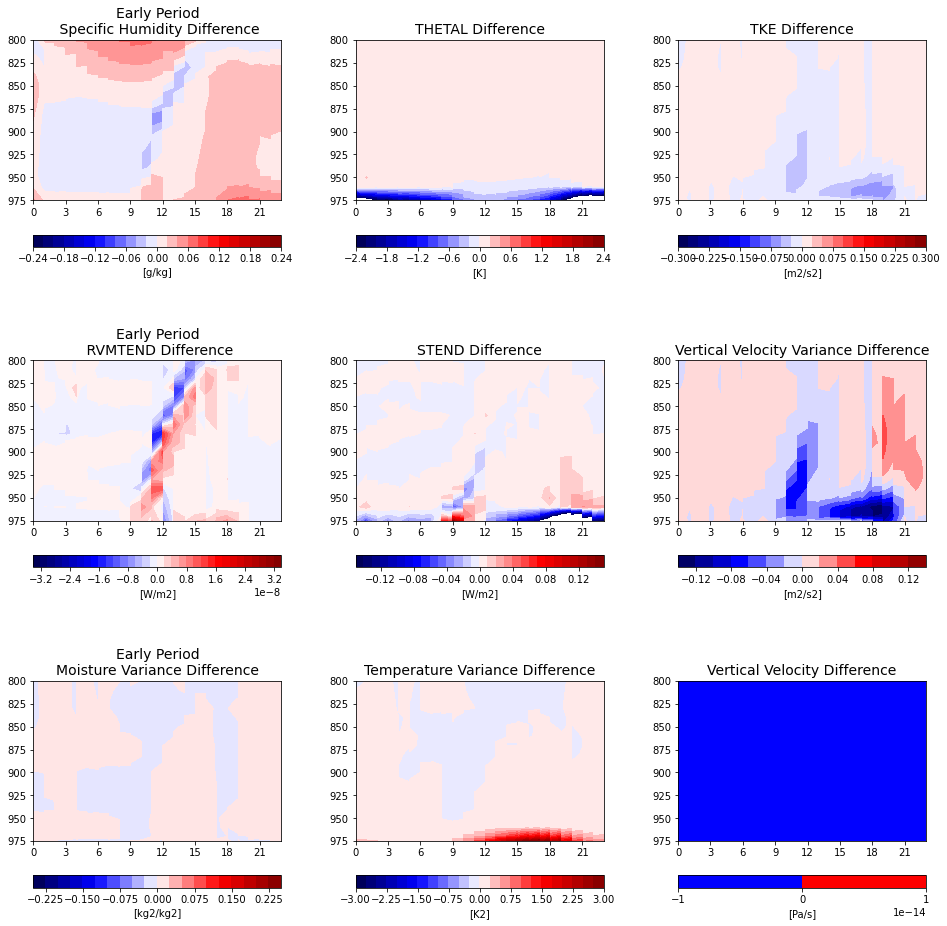

In [34]:
fig, axs_all = plt.subplots(3,3, figsize=(16, 16),
                     facecolor='w', edgecolor='k')
axs = axs_all.ravel()
fig.subplots_adjust(hspace=0.4,wspace=0.3)

# Define contour levels
#Qdiff_levs = np.arange(-0.5,0.55,0.05)
Qdiff_levs = np.arange(-0.24,0.26,0.02)
Tdiff_levs = np.arange(-2.4,2.6,0.2)
TKEdiff_levs = np.arange(-0.3,0.325,0.025)
buoyDiff_levs = np.arange(-30,32,2)
moistFluxDiff_levs = np.arange(-30,32,2)
tempFluxDiff_levs  = np.arange(-30,32,2)
vertVelDiff_levs   = np.arange(-0.14,0.14,0.02)
RVMTENDlevs = np.arange(-3.4e-8, 3.6e-8, 0.2e-8)
STENDlevs = np.arange(-0.15,0.16,0.01)
omegaLevs = 20 

# --- Plot differences (HTG-HMG) defined above ---

# Plot difference in moisture (specific humidity)
cmap    = axs[0].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_QdiffTHLP2*1000.0), Qdiff_levs,
                      cmap='seismic')
axs[0].set_ylim([800,975])
axs[0].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[0].set_title('Early Period\n Specific Humidity Difference', fontsize=14)
axs[0].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[0,0],orientation='horizontal',label = '[g/kg]')
# axs2 = axs[0].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])

# Plot difference in temperature (THETAL)
cmap    = axs[1].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_THLPdiffTHLP2), Tdiff_levs,
                      cmap='seismic')
axs[1].set_ylim([800,975])
axs[1].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[1].set_title('THETAL Difference', fontsize=14)
axs[1].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[0,1],orientation='horizontal',label = '[K]')
# axs2 = axs[1].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])

# Plot difference in TKE
cmap    = axs[2].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_TKEdiffTHLP1), TKEdiff_levs,
                      cmap='seismic')
axs[2].set_ylim([800,975])
axs[2].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[2].set_title('TKE Difference', fontsize=14)
axs[2].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[0,2],orientation='horizontal',label = '[m2/s2]')
# axs2 = axs[2].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])



# # Plot difference in Buoyancy Flux
# cmap    = axs[2].contourf(timesHMG_32local[timeSel].hour,pnew64, np.transpose(earlyPeriod_WPTHLPdiff64), buoyDiff_levs,
#                       cmap='seismic')
# axs[2].set_ylim([800,975])
# axs[2].xaxis.set_major_locator(plt.MaxNLocator(8))
# axs[2].set_title('Buoyancy Flux Difference', fontsize=14)
# axs[2].invert_yaxis()
# fig.colorbar(cmap,ax=axs_all[0,2],orientation='horizontal',label = '[W/m2]')
# axs2 = axs[2].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])

# Plot difference in moisture flux
cmap    = axs[3].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_RVMTENDdiffTHLP2), RVMTENDlevs,
                      cmap='seismic')
axs[3].set_ylim([800,975])
axs[3].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[3].set_title('Early Period\n RVMTEND Difference', fontsize=14)
axs[3].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[1,0],orientation='horizontal',label = '[W/m2]')
# axs2 = axs[3].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])

# Plot difference in temperature flux
cmap    = axs[4].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_STENDdiffTHLP2), STENDlevs,
                      cmap='seismic')
axs[4].set_ylim([800,975])
axs[4].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[4].set_title('STEND Difference', fontsize=14)
axs[4].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[1,1],orientation='horizontal',label = '[W/m2]')
# axs2 = axs[4].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])

# Plot difference in vertical velocity
cmap    = axs[5].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_WP2diffTHLP2), vertVelDiff_levs,
                      cmap='seismic')
axs[5].set_ylim([800,975])
axs[5].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[5].set_title('Vertical Velocity Variance Difference', fontsize=14)
axs[5].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[1,2],orientation='horizontal',label = '[m2/s2]')
# axs2 = axs[5].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])

# ------- Third row ------
rtp2Diff_levs = np.arange(-0.25,0.275,0.025)
thlp2Diff_levs = np.arange(-3,3.25,0.25)
wsubDiff_levs = np.arange(-0.2,0.225,0.025)

# Plot difference in RTP2
cmap    = axs[6].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_RTP2diffTHLP2), rtp2Diff_levs,
                      cmap='seismic')
axs[6].set_ylim([800,975])
axs[6].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[6].set_title('Early Period\nMoisture Variance Difference', fontsize=14)
axs[6].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[2,0],orientation='horizontal',label = '[kg2/kg2]')
# axs2 = axs[5].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])

# Plot difference in THLP2
cmap    = axs[7].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_THLP2diffTHLP2), thlp2Diff_levs,
                      cmap='seismic')
axs[7].set_ylim([800,975])
axs[7].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[7].set_title('Temperature Variance Difference', fontsize=14)
axs[7].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[2,1],orientation='horizontal',label = '[K2]')
# axs2 = axs[5].twinx()
# axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# axs2.set_ylim([0,2000])

# Plot difference in OMEGA
cmap    = axs[8].contourf(timesHMG_local[timeSel].hour,pnew64, np.transpose(earlyPeriod_OMEGAdiffTHLP2), omegaLevs,
                      cmap='seismic')
axs[8].set_ylim([800,975])
axs[8].xaxis.set_major_locator(plt.MaxNLocator(8))
axs[8].set_title('Vertical Velocity Difference', fontsize=14)
axs[8].invert_yaxis()
fig.colorbar(cmap,ax=axs_all[2,2],orientation='horizontal',label = '[Pa/s]')




# # Plot difference in WSUB
# cmap    = axs[8].contourf(timesHMG_32local[timeSel].hour,pnew64, np.transpose(earlyPeriod_WSUBdiffT), wsubDiff_levs,
#                       cmap='seismic')
# axs[8].set_ylim([800,975])
# axs[8].xaxis.set_major_locator(plt.MaxNLocator(8))
# axs[8].set_title('WSUB Difference', fontsize=14)
# axs[8].invert_yaxis()
# fig.colorbar(cmap,ax=axs_all[2,2],orientation='horizontal',label = '[m/s]')
# # axs2 = axs[5].twinx()
# # axs2.plot(meanDiurnal_HTG32.hour.values,htg64_diurnalPBLH_earlyDry,color='k',linestyle='--',label='HTG')
# # axs2.set_ylim([0,2000])




# Limit x axis?
# axs[0].set_xlim([6,19])
# axs[1].set_xlim([6,19])
# axs[2].set_xlim([6,19])
# axs[3].set_xlim([6,19])
# axs[4].set_xlim([6,19])
# axs[5].set_xlim([6,19])
# axs[6].set_xlim([6,19])
# axs[7].set_xlim([6,19])
# axs[8].set_xlim([6,19])


